# Aim
The aim of this project is to understand the various facts like economic, personal and social on the students performance.

# Inferences would be :
1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. What is the effect of test preparation on test scores?

# Contents
<ol>
    <li><a href="#Importing" style = "text-decoration: none;" ><b>Importing the libraries and the data.</b></a></li>
    <br>
    <li><a href="#Understand" style = "text-decoration: none;" ><b>Understanding the data.</b></a></li>
    <br>
    <li><a href="#Analysis" style = "text-decoration: none;" ><b>Data analysis and visualization.</b></a></li>
    <br>  
    <ol>
      <li><a href="#Math" style = "text-decoration: none;" >How many students passed in Math exam ?</a></li>
      <br>
      <li><a href="#Reading" style = "text-decoration: none;" >How many studends passed in reading ?</a></li>
      <br>
      <li><a href="#Writing" style = "text-decoration: none;" >How many students passed writing ?</a></li>
      <br>
      <li><a href="#All_subjects" style = "text-decoration: none;" >How many students passed in all the subjects ?</a></li>
      <br>
      <li><a href="#Grades" style = "text-decoration: none;" >What are the grades of the students ?</a></li>
      <br>
    </ol>
    <li><a href="#Preprocessing" style = "text-decoration: none;" ><b>Preprocessing the data.</b></a></li>
    <br> 
    <ol>
      <li><a href="#removing" style = "text-decoration: none;" >Removing unnecessary columns.</a></li>
      <br>
      <li><a href="#transform" style = "text-decoration: none;" >Transform target categories into numbers.</a></li>
      <br>
      <li><a href="#hot_encoding" style = "text-decoration: none;" >One hot encoding for categorical columns.</a></li>
      <br>
      <li><a href="#normalizing" style = "text-decoration: none;" >Normalizing the continous columns.</a></li>
      <br>
      <li><a href="#splitting" style = "text-decoration: none;" >Splitting the data.</a></li>
      <br>
    </ol>
    <li><a href="#modelling" style = "text-decoration: none;" ><b>developing the machine learning models</b></a></li>
    <br> 
    <ol>
      <li><a href="#Lg_R" style = "text-decoration: none;" >Logistic regression.</a></li>
      <br>
      <li><a href="#D_T" style = "text-decoration: none;" >Decision tree.</a></li>
      <br>
      <li><a href="#svm" style = "text-decoration: none;" >SVM.</a></li>
      <br>
      <li><a href="#KNN" style = "text-decoration: none;" >K-Nearest neighbors.</a></li>
      <br>
      <li><a href="#R_F" style = "text-decoration: none;" >Random forrest</a></li>
      <br>
    </ol>
    <li><a href="#evaluate" style = "text-decoration: none;" ><b>Evaluating the model</b></a></li>
    <br> 
</ol>

    

# Importing the libraries and the data <a name = "Importing"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the data
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
# setting the minimum mark to pass equal 40 degrees
passmark = 40

# Understanding the data <a name = "Understand"></a>

In [4]:
# getting first 5 rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# getting last 5 rows of the data
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# getting the size of the data
print(df.shape)

(1000, 8)


In [7]:
# understanding the basic information about the data 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# check if there any missing values
print(df.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


As we can see there is no null values in this dataset.

# Data analysis and visualization <a name = "Analysis"></a>

<h2 align = "center" style="color:red">1. How many students passed in Math exam  ?</h2> <a name="Math"></a>

### number of students passed in the math exam

In [9]:
df['Math_PassStatus'] = np.where(df["math score"]>=40,"P","F") 

In [10]:
print(df['Math_PassStatus'].value_counts())

P    960
F     40
Name: Math_PassStatus, dtype: int64


### visualizing the corelation between Math scores and education level

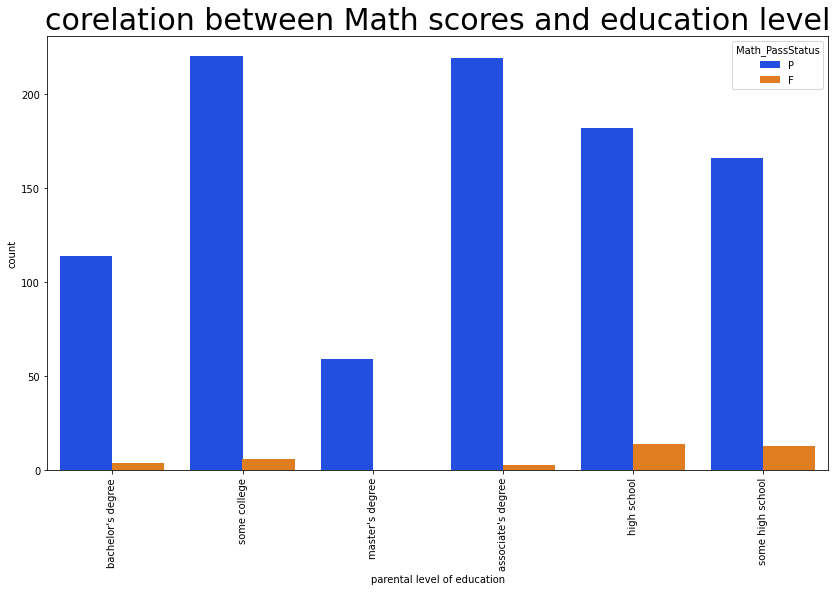

In [11]:
plt.figure(figsize = (14,8))
sns.countplot(x = "parental level of education", data = df , hue = "Math_PassStatus" , palette="bright")
plt.title("corelation between Math scores and education level", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

### Visualizing the Math scores

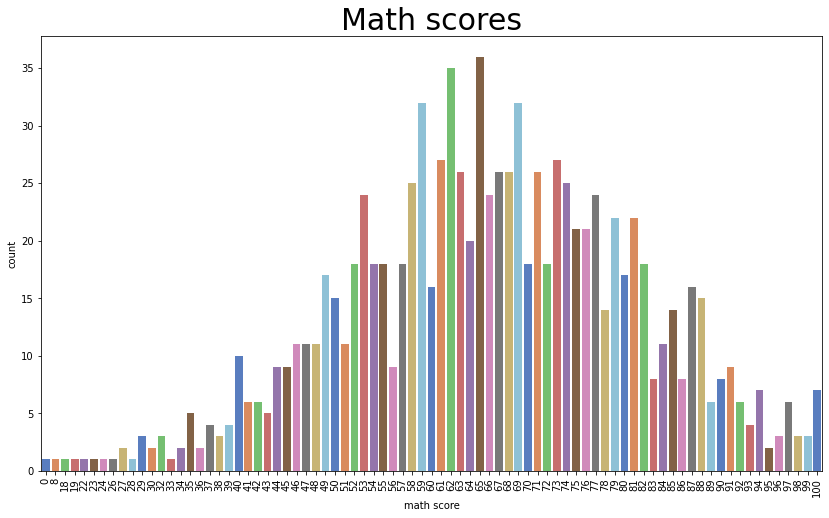

In [12]:
plt.figure(figsize = (14,8))
sns.countplot(x = "math score", data = df , palette="muted")
plt.title("Math scores", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

<h2 align = "center" style="color:red">2. How many students passed in Reading exam  ?</h2> <a name="Reading"></a>

### number of students passed in the reading exam

In [13]:
df['Reading_PassStatus'] = np.where(df["reading score"]>=40,"P","F") 

In [14]:
print(df['Reading_PassStatus'].value_counts())

P    974
F     26
Name: Reading_PassStatus, dtype: int64


### visualizing the corelation between Reading scores and education level

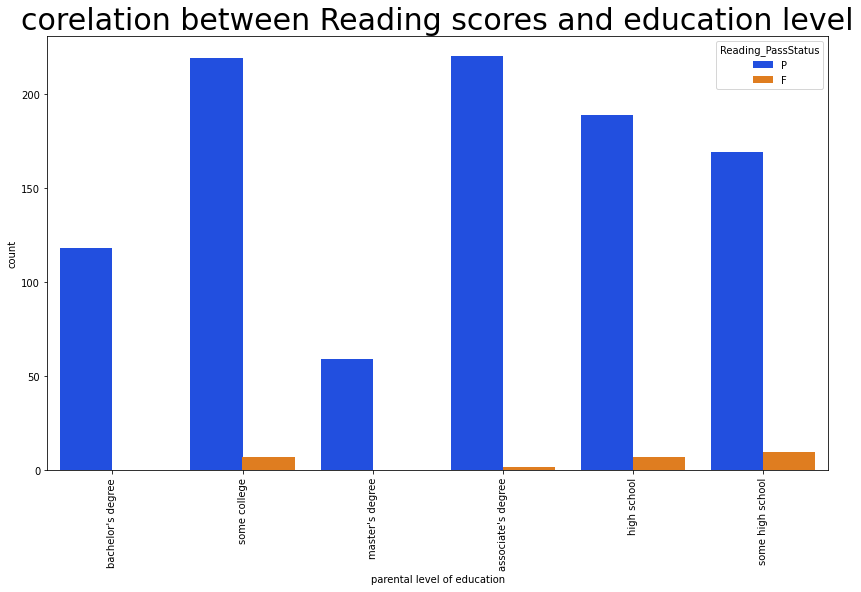

In [15]:
plt.figure(figsize = (14,8))
sns.countplot(x = "parental level of education", data = df , hue = "Reading_PassStatus" , palette="bright")
plt.title("corelation between Reading scores and education level", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

### Visualizing the Reading scores

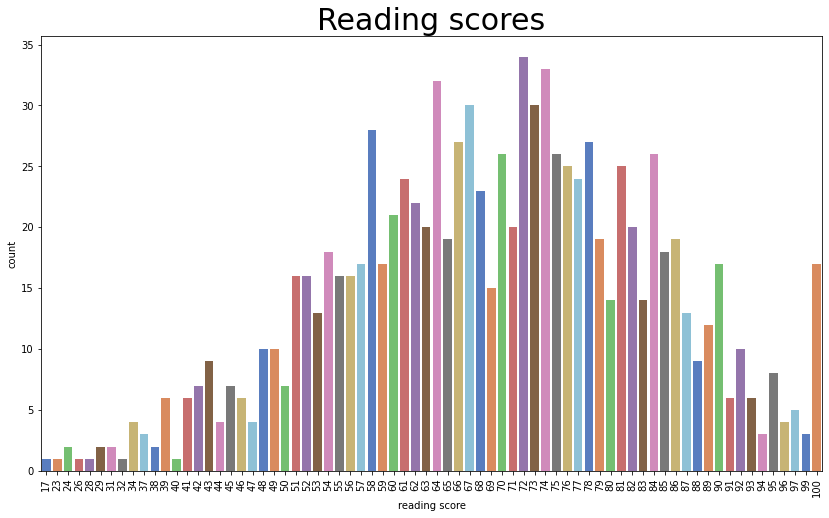

In [16]:
plt.figure(figsize = (14,8))
sns.countplot(x = "reading score", data = df , palette="muted")
plt.title("Reading scores", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

<h2 align = "center" style="color:red">3. How many students passed in Writing exam ?</h2> <a name="Writing"></a>

In [17]:
df['Writing_PassStatus'] = np.where(df["writing score"]>=40,"P","F") 

In [18]:
print(df['Writing_PassStatus'].value_counts())

P    968
F     32
Name: Writing_PassStatus, dtype: int64


### visualizing the corelation between writing scores and education level

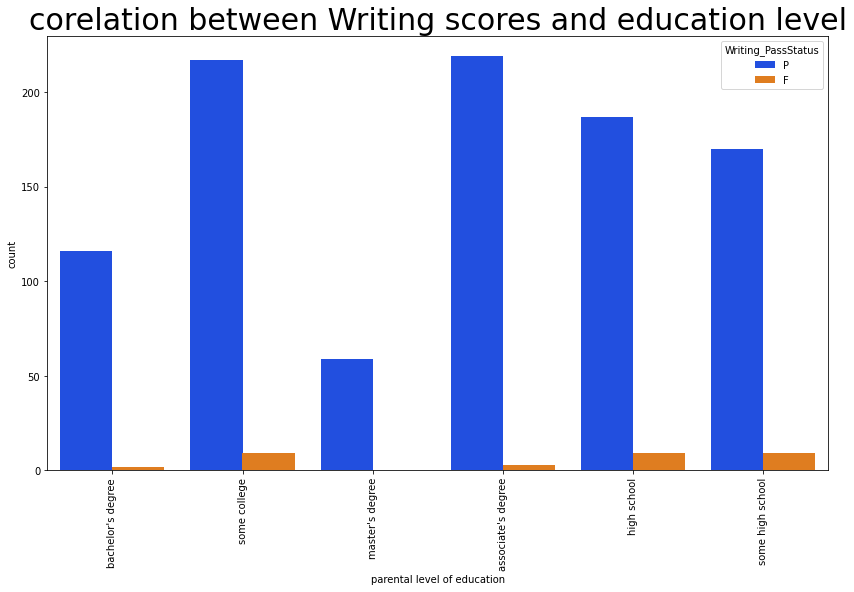

In [19]:
plt.figure(figsize = (14,8))
sns.countplot(x = "parental level of education", data = df , hue = "Writing_PassStatus" , palette="bright")
plt.title("corelation between Writing scores and education level", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

### Visualizing the Writing scores

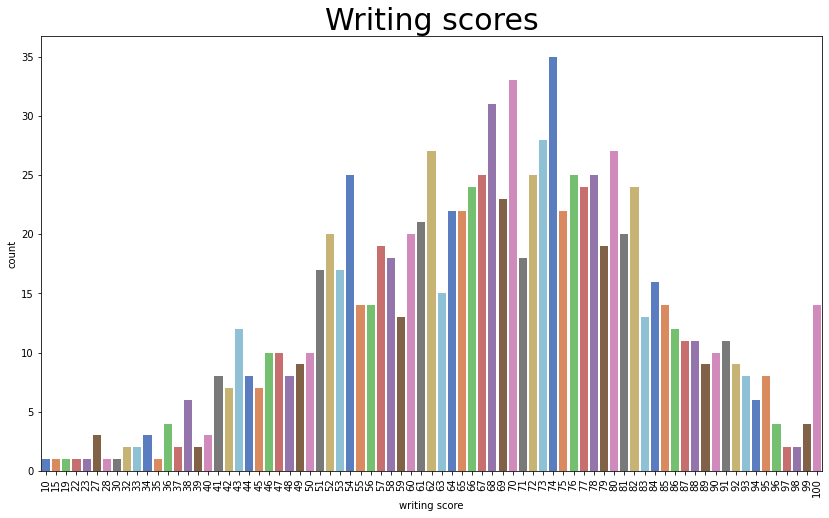

In [20]:
plt.figure(figsize = (14,8))
sns.countplot(x = "writing score", data = df , palette="muted")
plt.title("Writing scores", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

<h2 align = "center" style="color:red">4. How many students passed in all the subjects ?</h2> <a name="All_subjects"></a>

In [21]:
df['OverAll_PassStatus'] = df.apply(lambda x : "F" if x['Math_PassStatus'] =="F" or
                        x['Reading_PassStatus'] =="F" or x['Writing_PassStatus'] =="F" else "P" , axis = 1 )

In [22]:
print(df['OverAll_PassStatus'].value_counts())

P    949
F     51
Name: OverAll_PassStatus, dtype: int64


### visualizing the corelation between percentage of total marks and education level

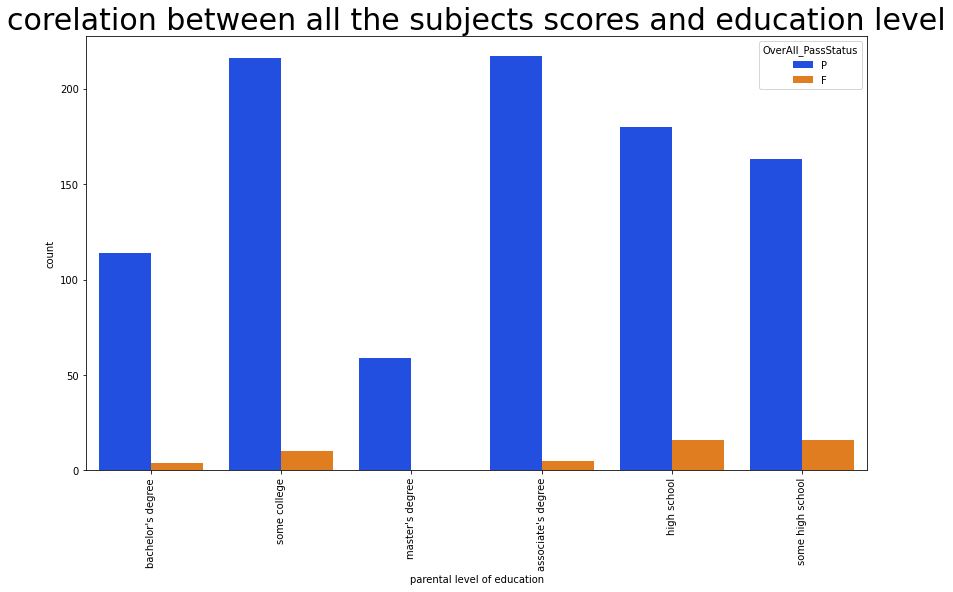

In [23]:
plt.figure(figsize = (14,8))
sns.countplot(x = "parental level of education", data = df , hue = "OverAll_PassStatus" , palette="bright")
plt.title("corelation between all the subjects scores and education level", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

### Visualizing the percentages of students

In [24]:
# rounding the percantage to the nearest integer to make the visualization clear
df["Percentage"] = (df["math score"] + df["writing score"] + df["reading score"] ) // 3

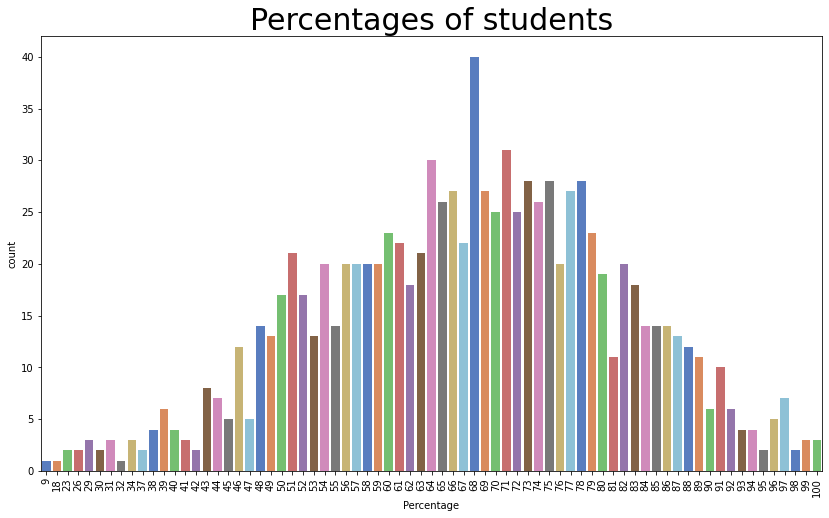

In [25]:
plt.figure(figsize = (14,8))
sns.countplot(x = "Percentage", data = df , palette="muted")
plt.title("Percentages of students", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

<h2 align = "center" style="color:red">5. What are The grades of the students ?</h2> <a name="Grades"></a>

### Assigning the grades

#### Grading

- above 80 = A Grade
- 70 to 80 = B Grade
- 60 to 70 = C Grade
- 50 to 60 = D Grade
- 40 to 50 = E Grade
- below 40 = F Grade ( means Fail )

In [26]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'
    
df['Grade'] = df.apply( lambda x : GetGrade(x['Percentage'],x['OverAll_PassStatus']), axis = 1)
print(df.Grade.value_counts())

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64


### Visualizing the grades in order

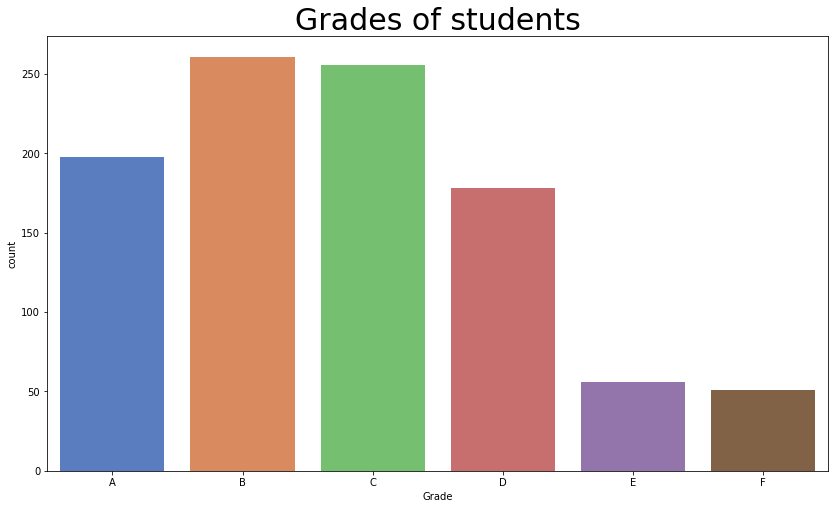

In [27]:
plt.figure(figsize = (14,8))
sns.countplot(x = "Grade",order=['A','B','C','D','E','F'], data = df , palette="muted")
plt.title("Grades of students", fontsize = 30)
plt.show()

### Visualizing the corelation between Grades and education level

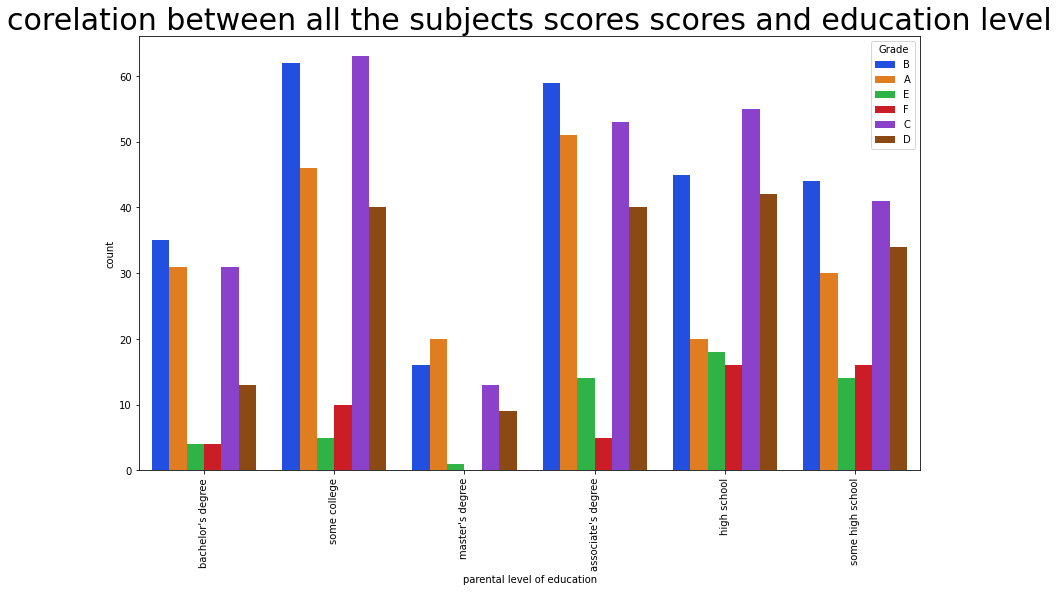

In [28]:
plt.figure(figsize = (14,8))
sns.countplot(x = "parental level of education", data = df , hue = "Grade" , palette="bright")
plt.title("corelation between all the subjects scores scores and education level", fontsize = 30)
plt.xticks(rotation=90)
plt.show()

# Data preprocessing <a name = "Preprocessing"></a>

### Removing unnecessary columns <a name = "removing"></a>

In [29]:
#seeing the data to know wich collumns is not important for the machine learning model
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,OverAll_PassStatus,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,P,72,B
1,female,group C,some college,standard,completed,69,90,88,P,P,P,P,82,A
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,P,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,P,49,E
4,male,group C,some college,standard,none,76,78,75,P,P,P,P,76,B


In [30]:
# printing the columns
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Math_PassStatus', 'Reading_PassStatus',
       'Writing_PassStatus', 'OverAll_PassStatus', 'Percentage', 'Grade'],
      dtype='object')

In [31]:
# dropping the columns which are not useful
df.drop(['Math_PassStatus', 'Reading_PassStatus',
       'Writing_PassStatus', 'OverAll_PassStatus', 'Percentage'], axis = 1, inplace = True)

In [32]:
# seeing the data after removing the unnecessary columns
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,B
1,female,group C,some college,standard,completed,69,90,88,A
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,E
4,male,group C,some college,standard,none,76,78,75,B


### Transform target categories into numbers  <a name = "transform"></a>

In [33]:
cleanup_grades = {'F':0,'E':1,'D':2,'C':3,'B':4,'A':5}
target = df['Grade'].replace(cleanup_grades)

In [34]:
target.head()

0    4
1    5
2    5
3    1
4    4
Name: Grade, dtype: int64

### One hot encoding for categorical columns <a name = "hot_encoding"></a>

In [35]:
features = pd.get_dummies(data=df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'])
features.drop(['Grade'],axis = 1 ,inplace = True)

In [36]:
features.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


### Normalizing the continous columns <a name = "normalizing"></a>

In [37]:
    from sklearn import preprocessing

    x = df[['math score', 'reading score', 'writing score']].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    features[['math score', 'reading score', 'writing score']] = pd.DataFrame(x_scaled)

In [38]:
features.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.72,0.662651,0.711111,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,0.69,0.879518,0.866667,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,0.90,0.939759,0.922222,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,0.47,0.481928,0.377778,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0.76,0.734940,0.722222,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


### Splitting the data  <a name = "splitting"></a>

In [39]:
# splitting the data into 80% training set and 20% testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Modelling <a name = "modelling"></a>

In [40]:
accuracy_scores = {}

### Logistic regression <a name = "Lg_R"></a>

In [41]:
from sklearn.linear_model import LogisticRegression
Lg_R = LogisticRegression(solver='lbfgs', max_iter=1000)
Lg_R.fit(X_train, y_train)
predictions = Lg_R.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

# Logistic regression accuracy
print(accuracy_score(y_test, predictions))

0.7


### Decision tree <a name = "D_T"></a>

In [43]:
from sklearn import tree
D_T = tree.DecisionTreeClassifier()
D_T.fit(X_train, y_train)
predictions = D_T.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

# Decision tree
print(accuracy_score(y_test, predictions))

0.88


### SVM  <a name = "svm"></a>

In [45]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
predictions = svc.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

# SVM accuracy
print(accuracy_score(y_test, predictions))

0.455


### K-Nearest neighbors <a name = "KNN"></a>

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)
predictions = KNN.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

# K-Nearest neighbors accuracy
print(accuracy_score(y_test, predictions))

0.635


### Random forrest <a name = "R_F"></a>

In [49]:
from sklearn.ensemble import RandomForestClassifier
R_F =  RandomForestClassifier(max_depth=10, random_state=0)
R_F.fit(X_train, y_train)
predictions = R_F.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

# Random forrest accuracy
print(accuracy_score(y_test, predictions))

0.915


# Comparing and evaluating the models <a name = 'evaluate'></a>

In [51]:
accuracy_scores = {'models' : ['Logistic regression', 'Decision tree', 'SVM', 'K-Nearest neighbors', 'Random forrest'],
                   'scores': [70 , 87.5 , 45.5 , 63.5 , 91.5]}

In [52]:
accuracy_scores = pd.DataFrame(accuracy_scores, columns=['models', 'scores'])
accuracy_scores.set_index('models', inplace=True)
accuracy_scores.head()

,scores
models,
Logistic regression,70.0
Decision tree,87.5
SVM,45.5
K-Nearest neighbors,63.5
Random forrest,91.5


so we can conclude that Random forrests is the best algorithm for this classification problem by far with 91.5% accuracy.